In [1]:
import os
import sys

import seaborn
import itertools
import keras

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
!ls -lha /root

total 68K
drwx------ 14 root root 4.0K Jul 11 02:24 .
drwxr-xr-x 55 root root 4.0K Jul  6 14:32 ..
-rw-------  1 root root 7.3K Jul  6 18:51 .bash_history
-rw-r--r--  1 root root 3.1K Oct 22  2015 .bashrc
drwx------  5 root root 4.0K Jun 30 17:13 .cache
drwxr-xr-x  3 root root 4.0K Jun 30 15:57 .config
-rw-r--r--  1 root root   47 Jun 30 16:54 .gitconfig
drwxr-xr-x  2 root root 4.0K Jun 30 16:50 .ipynb_checkpoints
drwxr-xr-x  5 root root 4.0K Jun 30 15:42 .ipython
drwxr-xr-x  2 root root 4.0K Jul  1 09:46 .jupyter
drwxr-xr-x  2 root root 4.0K Jun 30 15:57 .keras
drwx------  3 root root 4.0K Jun 30 05:50 .local
drwxr-xr-x  2 root root 4.0K Jul  3 20:29 .nano
-rw-r--r--  1 root root  148 Aug 17  2015 .profile
drwxr-xr-x  3 root root 4.0K Jul 11 03:44 data
drwxr-xr-x  5 root root 4.0K Jun 30 16:51 deep-coin


In [3]:
data_dir = '/root/data'
btc_usd_hist_csv = os.path.join(data_dir, 'btc-usd-bvn-li-hist.csv')
assert os.path.exists(btc_usd_hist_csv), "The {} file does not exist".format(btc_usd_hist_csv)

In [4]:
btc_usd_hist_df = pd.read_csv(btc_usd_hist_csv)
btc_usd_hist_df.head()

,Date,Open,High,Low,Close,Volume,Volume_USD,VWAP,TWAP
0,2017-07-08,2495.949316,2552.081317,2465.342566,2550.409252,35144.174838,8.808445e+07,2508.250713,2511.134108
1,2017-07-07,2601.928393,2605.802566,2468.264028,2496.042295,62088.568865,1.567033e+08,2528.377321,2542.552255
2,2017-07-06,2610.355742,2613.994320,2574.861977,2601.829066,41087.404062,1.064584e+08,2593.659363,2595.547947
3,2017-07-05,2598.566114,2626.097712,2532.945394,2610.947179,63930.492436,1.647119e+08,2575.807887,2571.457152
4,2017-07-04,2543.986109,2633.409272,2543.986109,2599.123018,52024.918531,1.348385e+08,2593.923887,2594.774546


In [5]:
df = btc_usd_hist_df.drop(btc_usd_hist_df.columns[[0, 6, 7, 8]], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,2495.949316,2552.081317,2465.342566,2550.409252,35144.174838
1,2601.928393,2605.802566,2468.264028,2496.042295,62088.568865
2,2610.355742,2613.994320,2574.861977,2601.829066,41087.404062
3,2598.566114,2626.097712,2532.945394,2610.947179,63930.492436
4,2543.986109,2633.409272,2543.986109,2599.123018,52024.918531


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


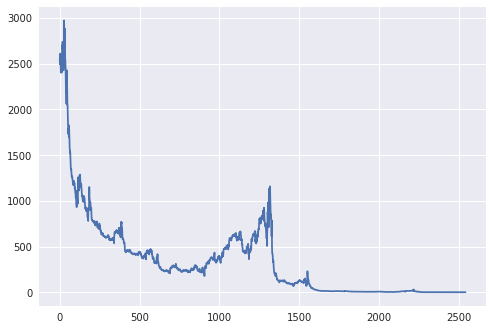

In [6]:
plt.plot((df.drop(df.columns[[0, 1, 2, 4]], axis=1)))
plt.show()

In [7]:
df = df.sort_index(axis=0 ,ascending=False)
df.head()

,Open,High,Low,Close,Volume
2541,0.05941,0.08585,0.059410,0.085840,75.01
2540,0.09090,0.09307,0.078905,0.080800,574.00
2539,0.08181,0.08181,0.074260,0.074733,262.00
2538,0.07425,0.07921,0.066340,0.079210,575.00
2537,0.07921,0.08080,0.054460,0.054955,2160.00


In [8]:
df = df.reset_index(drop=True)
df.head()

,Open,High,Low,Close,Volume
0,0.05941,0.08585,0.059410,0.085840,75.01
1,0.09090,0.09307,0.078905,0.080800,574.00
2,0.08181,0.08181,0.074260,0.074733,262.00
3,0.07425,0.07921,0.066340,0.079210,575.00
4,0.07921,0.08080,0.054460,0.054955,2160.00


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


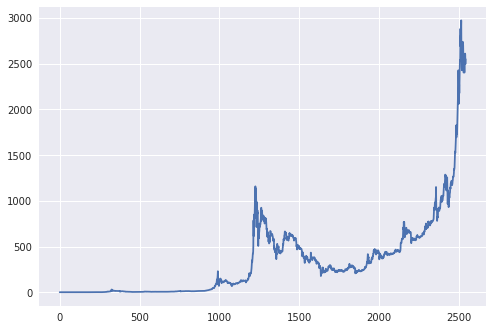

In [9]:
plt.plot((df.drop(df.columns[[0, 1, 2, 4]], axis=1)))
plt.show()